## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

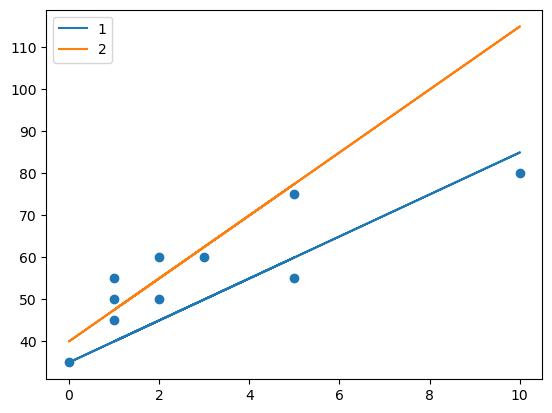

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

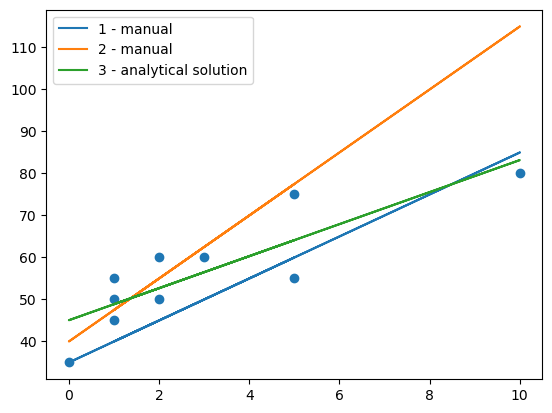

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.0625, 45.29125)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

Уменьшил шаг обучения до оптимального по скорости + увеличил количество итераций до 200. Согласно получаемому MSE можно уменьшить количество итераций до 150, но мы берем с запасом.

In [129]:
n = X.shape[1]

alpha = 9e-2
iterCount = 200

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(iterCount):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.09        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [10.72 34.43], MSE = 3047.75
Iteration #10: W_new = [ 2276.33841618 12409.86650201], MSE = 796432997.11
Iteration #20: W_new = [ 262978.48744009 1450044.52016754], MSE = 14701686451429.94
Iteration #30: W_new = [ 6241364.00818315 34418831.70511375], MSE = 1.1394319142061618e+16
Iteration #40: W_new = [2.68067569e+07 1.47830133e+08], MSE = 2.9587757272246675e+17
Iteration #50: W_new = [17974890.99340411 99125318.78568736], MSE = 1.9286985343530627e+17
Iteration #60: W_new = [1548373.20234156 8538524.82755653], MSE = 2157273408111664.8
Iteration #70: W_new = [13147.39827569 72262.4199961 ], MSE = 245728807162.95
Iteration #80: W_new = [52.0124153  44.55961881], MSE = 133904.39
Iteration #90: W_new = [44.76446079  3.86739348], MSE = 44.01
Iteration #100: W_new = [44.84630987  3.85170275], MSE = 43.99
Iteration #110: W_new = [44.90104023  3.84177824], MSE = 43.98
Iteration #120: 

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


При вычислении весов формулой `W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))` мы каждый раз будем уменьшать оба веса на констунту. Для корректного вычисления каждого веса отдельно будем использовать формулу `W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))`. Таким образом мы будем перерасчитывать приращение для каждого веса.

In [130]:
n = X.shape[1]
alpha = 1e-2
iterCount = 200
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(iterCount):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [141]:
def calc_W(X, y, alpha, tol):
    n = X.shape[1]
    W = np.array([1, 0.5])
    print(f'Number of objects = {n} \
           \nLearning rate = {alpha} \
           \nInitial weights = {W} \n')
    prev_err = 0
    i = 0
    while True:
        i+=1
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1))
        if np.absolute(prev_err-err)<tol:
            print(f'Stop iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
            return W
        prev_err = err
        if i % 10 == 0:
            print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    

In [142]:
calc_W(X,y,1e-2,0.01)

Number of objects = 10            
Learning rate = 0.01            
Initial weights = [1.  0.5] 

Iteration #10: W_new = [ 6.64172205 10.62940003], MSE = 752.02
Iteration #20: W_new = [10.02900674 10.16329008], MSE = 632.72
Iteration #30: W_new = [13.09636548  9.60903915], MSE = 534.14
Iteration #40: W_new = [15.89487851  9.10159809], MSE = 452.07
Iteration #50: W_new = [18.44838865  8.63855875], MSE = 383.75
Iteration #60: W_new = [20.77834901  8.21605636], MSE = 326.86
Iteration #70: W_new = [22.90433054  7.83054239], MSE = 279.49
Iteration #80: W_new = [24.84419078  7.47877865], MSE = 240.06
Iteration #90: W_new = [26.61422391  7.15781043], MSE = 207.23
Iteration #100: W_new = [28.22929764  6.86494171], MSE = 179.9
Iteration #110: W_new = [29.70297804  6.59771249], MSE = 157.14
Iteration #120: W_new = [31.04764353  6.35387814], MSE = 138.19
Iteration #130: W_new = [32.27458888  6.13139052], MSE = 122.41
Iteration #140: W_new = [33.39412     5.92838081], MSE = 109.28
Iteration #150: 

array([44.00437352,  4.00437492])